In [27]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

import pandas as pd
import numpy as np

In [28]:
train_df = pd.read_csv('../task2/preprocessed_train.csv')
test_df = pd.read_csv('../task2/preprocessed_test.csv')

In [29]:
train_df,test_df

(                                                 review  sentiment
 0     One of the other reviewer ha mentioned that af...          1
 1     A wonderful little production . The filming te...          1
 2     I thought this wa a wonderful way to spend tim...          1
 3     Basically there 's a family where a little boy...          0
 4     Petter Mattei 's `` Love in the Time of Money ...          1
 ...                                                 ...        ...
 1995  Feeling Minnesota , directed by Steven Baigelm...          0
 1996  THE CELL ( 2000 ) Rating : 8/10 The Cell , lik...          1
 1997  This movie , despite it list of B , C , and D ...          0
 1998  I loved this movie ! It wa all I could do not ...          1
 1999  This wa the worst movie I have ever seen Billy...          0
 
 [2000 rows x 2 columns],
                                                 review  sentiment
 0    Stranded in Space ( 1972 ) MST3K version - a v...          0
 1    - After their so

                                                    Labeling Target Vector

In [30]:
le = LabelEncoder()

In [31]:
train_df['sentiment'] = le.fit_transform(train_df['sentiment'])
test_df['sentiment'] = le.fit_transform(test_df['sentiment'])

In [32]:
train_df['sentiment'],test_df['sentiment']

(0       1
 1       1
 2       1
 3       0
 4       1
        ..
 1995    0
 1996    1
 1997    0
 1998    1
 1999    0
 Name: sentiment, Length: 2000, dtype: int64,
 0      0
 1      1
 2      1
 3      1
 4      1
       ..
 495    0
 496    1
 497    1
 498    0
 499    1
 Name: sentiment, Length: 500, dtype: int64)

In [33]:
#Seperate texts and labels on train set
X_train = train_df.drop('sentiment',axis=1).values.flatten()
y_train = train_df['sentiment'].values
print('Train shape: ',X_train.shape)
stop_words = set(stopwords.words('english'))

Train shape:  (2000,)


In [34]:
#Seperate texts and labels on test set
X_test = test_df.drop('sentiment',axis=1).values.flatten()
y_test = test_df['sentiment'].values
print("Test shape: ",X_test.shape)

Test shape:  (500,)


In [35]:
vectorizer = CountVectorizer(binary=True)
selector = SelectKBest(mutual_info_classif, k=2000)

In [36]:
# This create a pipeline with two steps. 
# At the first step it will learn the vacabulary and then we get extract important features
pipeline = Pipeline([('Vect',vectorizer),('selector', selector)])

In [37]:
#This will execute all the fit function in a step wise manner
train_vector = pipeline.fit_transform(X_train,y_train)

In [38]:
#This will execute only transform function of all those object that have this functions in a step wise manner 
test_vector = pipeline.transform(X_test)

In [39]:
test_vector.shape,train_vector.shape

((500, 2000), (2000, 2000))

<h1 style=' text-align: center;'>Model</h1>

In [40]:
model = DecisionTreeClassifier(criterion='entropy',random_state=32)

In [41]:
model.fit(train_vector,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=32)

In [42]:
y_pred = model.predict(test_vector)

Accuracy: 0.7
Classwise Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       239
           1       0.71      0.71      0.71       261

    accuracy                           0.70       500
   macro avg       0.70      0.70      0.70       500
weighted avg       0.70      0.70      0.70       500


Confusion Matrix: 


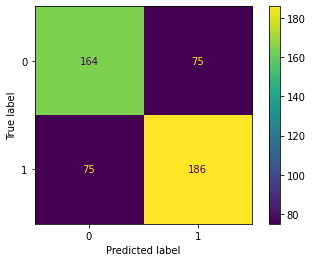

In [43]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classwise Classification Report: \n{classification_report(y_test, y_pred)}")
con_matrix = confusion_matrix(np.ravel(y_test), y_pred)
print("\nConfusion Matrix: ")
con_matrix = ConfusionMatrixDisplay(con_matrix)
con_matrix.plot()
plt.show()